# Use tensorflow 2.0 and keras to train classifiers for mnist and cifar10 datasets.



建立Tensorflow2.0-GPU版環境

In [0]:
!pip install tensorflow-gpu==2.0.0-rc1

In [0]:
#檢查tf版本
import tensorflow as tf
tf.__version__

'1.14.0'

# HW3-1 train classifiers for mnist

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [0]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

In [0]:
#將y_train的data轉成向量
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [0]:
y_train.shape, y_train.dtype

((60000, 10), dtype('float32'))

In [0]:
from PIL import Image
Image.fromarray(x_train[0])

In [0]:
#將資料正規化
#把資料縮放到-1~1之間
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


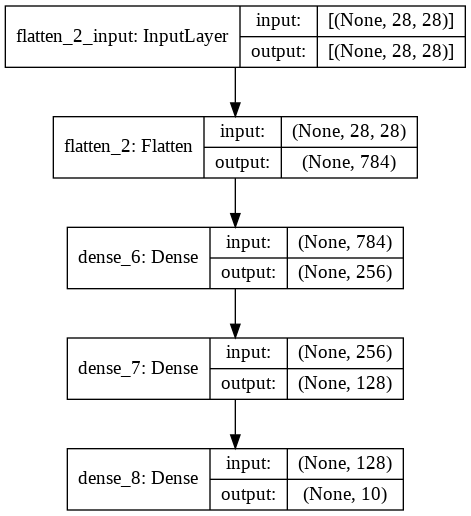

In [0]:
tf.keras.utils.plot_model(model,show_shapes=True,)

In [0]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1)
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0688 - acc: 0.9801 - val_loss: 0.0871 - val_acc: 0.9736
Epoch 2/15
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0628 - acc: 0.9822 - val_loss: 0.0808 - val_acc: 0.9739
Epoch 3/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0582 - acc: 0.9829 - val_loss: 0.0788 - val_acc: 0.9758
Epoch 4/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0533 - acc: 0.9849 - val_loss: 0.0808 - val_acc: 0.9754
Epoch 5/15
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0497 - acc: 0.9855 - val_loss: 0.0765 - val_acc: 0.9762
Epoch 6/15
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0457 - acc: 0.9869 - val_loss: 0.0705 - val_acc: 0.9773
Epoch 7/15
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0418 - acc: 0.9880 - val_l

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.0675 - acc: 0.9790


[0.0674594405147247, 0.979]

HW3-1 準確率：97.9 %

# HW3-2 train classifiers for Cifar10

In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
#將y_train的data轉成向量
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

y_train.shape

[[[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 ...

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]]


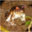

In [0]:
from PIL import Image
Image.fromarray(x_train[0])

In [0]:
#將資料正規化
#把資料縮放到-1~1之間
x_train = (x_train-127.5)/127.5
x_test = (x_test-127.5)/127.5

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(10, activation='softmax')    
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        73792     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250890    
Tota

In [0]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

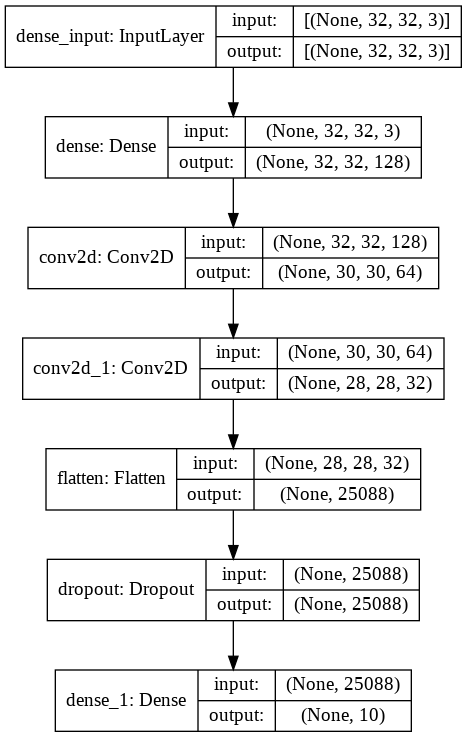

In [0]:
tf.keras.utils.plot_model(model,show_shapes=True,)

In [0]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 351us/sample - loss: 1.4270 - acc: 0.4907 - val_loss: 1.1955 - val_acc: 0.5775
Epoch 2/10
50000/50000 [==============================] - 15s 305us/sample - loss: 1.0981 - acc: 0.6119 - val_loss: 1.0736 - val_acc: 0.6210
Epoch 3/10
50000/50000 [==============================] - 15s 307us/sample - loss: 0.9656 - acc: 0.6610 - val_loss: 1.0533 - val_acc: 0.6309
Epoch 4/10
50000/50000 [==============================] - 15s 304us/sample - loss: 0.8797 - acc: 0.6918 - val_loss: 1.0141 - val_acc: 0.6516
Epoch 5/10
50000/50000 [==============================] - 15s 303us/sample - loss: 0.8066 - acc: 0.7188 - val_loss: 1.0424 - val_acc: 0.6404
Epoch 6/10
50000/50000 [==============================] - 15s 301us/sample - loss: 0.7450 - acc: 0.7375 - val_loss: 1.0255 - val_acc: 0.6484
Epoch 7/10
50000/50000 [==============================] - 15s 301us/sample - loss: 0.6847 - acc: 0.7563 

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 160us/sample - loss: 1.1190 - acc: 0.6501


[1.1190384840011596, 0.6501]

HW3-2 準確率：65%